In [ ]:
import numpy as np
import ctypes
from ctypes import byref
clib = ctypes.CDLL("wrapper.so")
import matplotlib.pyplot as plt

In [ ]:
import sys
sys.path.append('../gefera')
import gefera as gf

In [53]:
t = np.linspace(67.8, 68.9, 1000)

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -1.1
em = 0.1
pm = 3
om = 0.1 * np.pi / 180
wm = 90 * np.pi / 180
im = 88.0 * np.pi / 180
mm = 0.01

u1 = 0.5
u2 = 0.3
rp = 0.1
rm = 0.05

bo = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.System(bo, mo)
lc = sys.lightcurve(t, u1, u2, rp, rm)
lc_nomoon = sys.lightcurve(t, u1, u2, rp, 0.0)

In [54]:
au_r = 215.03215567054764

p, m = sys.coords(t)
xp, yp, zp = np.array(p)
xm, ym, zm = np.array(m) 

bp = np.sqrt(xp**2 + yp**2) * au_r
bm = np.sqrt(xm**2 + ym**2) * au_r
bpm = np.sqrt((xp - xm)**2 + (yp - ym)**2) * au_r

In [55]:
j = len(t)
bp = (ctypes.c_double * j).from_buffer(bp)
bm = (ctypes.c_double * j).from_buffer(bm)
bpm = (ctypes.c_double * j).from_buffer(bpm)
f = (ctypes.c_double * j).from_buffer(np.zeros(j))

clib.flux.restype = None

clib.flux(
    f, 
    bp, 
    bm, 
    bpm, 
    ctypes.c_double(rp), 
    ctypes.c_double(rm), 
    ctypes.c_double(0.0), 
    ctypes.c_double(u1 + 2 * u2), 
    ctypes.c_double(0.0), 
    ctypes.c_double(-u2),
    ctypes.c_int(j)
)

NameError: name 'ctypes' is not defined

NameError: name 'f' is not defined

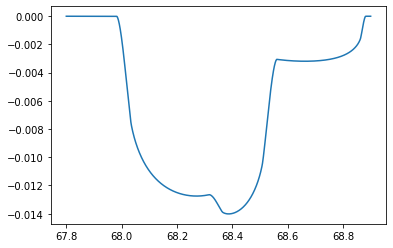

In [56]:
plt.plot(t, lc)
plt.plot(t, f + lc_nomoon)

In [ ]:
plt.plot(t, f + lc_nomoon - lc)

In [ ]:
fig = plt.figure(figsize=(5, 5))
sys.draw(fig.gca(), t[-1], rp, rm)

In [ ]:
from IPython.display import HTML
fig = plt.figure(figsize=(10, 10))
ani = sys.animate(fig, t[::10], rp, rm, ld_params=(0.5, 0.1))
HTML(ani.to_html5_video())

In [7]:
import luna as ln
import gefera as gf

In [93]:
t = np.linspace(67.5, 69.2, 1000)

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -2.2
em = 0.1
pm = 3.
om = 0.1 * np.pi / 180
wm = 90 * np.pi / 180
im = 88.0 * np.pi / 180
mm = 0.01

u1 = 0.5
u2 = 0.3
rp = 0.2
rm = 0.1

In [94]:
bo = ln.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = ln.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = ln.System(bo, mo)
lc_luna = sys.lightcurve(t, u1, u2, rp, rm)

In [95]:
bo = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.System(bo, mo)
lc_gefera = sys.lightcurve(t, u1, u2, rp, rm)

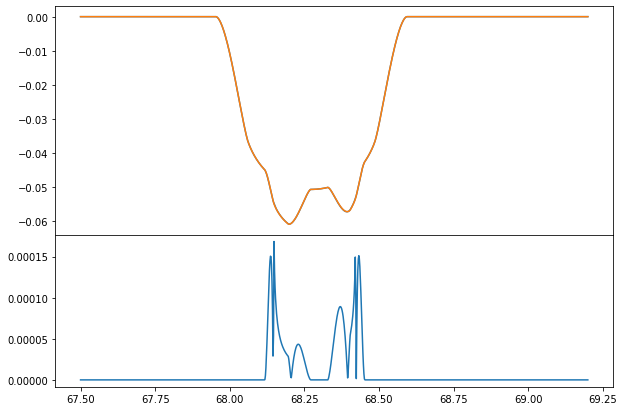

In [96]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(10, 7), sharex=True, gridspec_kw={'height_ratios': [0.6, 0.4]})
plt.subplots_adjust(hspace=0.0)
axs[0].plot(t, lc_luna)
axs[0].plot(t, lc_gefera)
axs[1].plot(t, np.abs(lc_luna - lc_gefera))